# Problem Statement

The majority of them now use credit cards to purchase items that they desperately need but are currently unable to afford. Credit cards are used to satisfy needs, but there is also an increase in credit card fraud, thus it is necessary to create a model that fits well and makes predictions with more accuracy.

# Objective

- Finding fraudulent credit card transactions is the primary goal of the research.
- Comparison between deep learning versus supervised learning, the deep learning algorithm performed better in terms of accuracy.

# Steps

the steps are broadly divided into below steps. The sub steps are also listed while we aproach each steps.


1. Reading, understanding and visualising data
2. Preparing the data for modeling
3. Building the model
4. Evaluate the model

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# Reading dataset

df = pd.read_csv('data/creditcard_csv.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


# Missing Values

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Based on above, we can see that there is no missing values.

# Classes Distribution

In [8]:
classes = df['Class'].value_counts()
classes

Class
'0'    284315
'1'       492
Name: count, dtype: int64

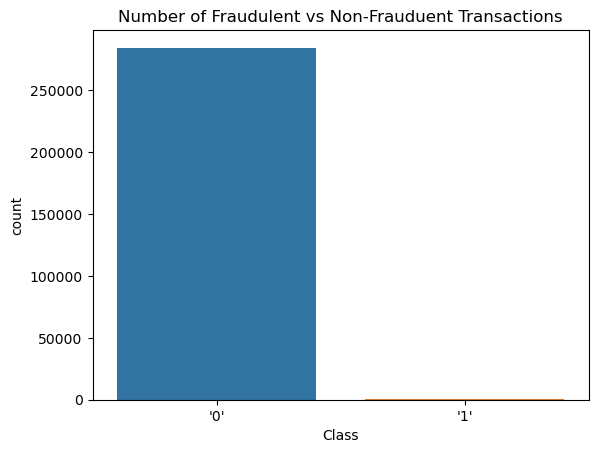

In [9]:
# Bar plot for the number of normal transaction and fraudulent transaction
sns.countplot(x=df['Class'], data=df)
plt.title('Number of Fraudulent vs Non-Frauduent Transactions')
plt.show()

In [10]:
normal = round((classes[0]/df['Class'].count()*100),2)
normal

99.83

In [11]:
fraud = round((classes[1]/df['Class'].count()*100),2)
fraud

0.17

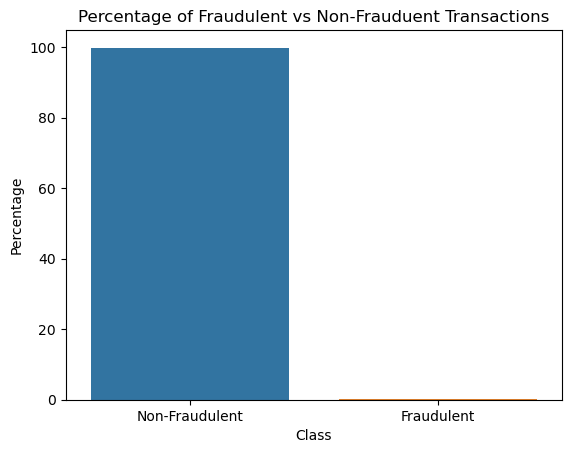

In [12]:
# Bar plot of the percentage of norma transaction and fraudulent transaction
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal, fraud]}
df_fraud_percentage = pd.DataFrame(fraud_percentage)
sns.barplot(x='Class', y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of Fraudulent vs Non-Frauduent Transactions')
plt.show()

# Outliers Treatment

We are not performing any outliers treatment for this dataset as all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.

## Changing Class into interger data type

In [13]:
df['Class'].unique()

array(["'0'", "'1'"], dtype=object)

In [14]:
df['Class'] = df['Class'].replace({"'0'":'0', "'1'":'1'})

In [15]:
df['Class'] = df['Class'].astype(int)

In [16]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Class Corelation with Time and Amount

### Class corelation with time

In [17]:
time_corr = df['Class'].corr(df['Time'], method='pearson')
time_corr

-0.012322570929245625

As shown above, class dont have a corelation with time

### Observe the distribution of classes with time

In [18]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

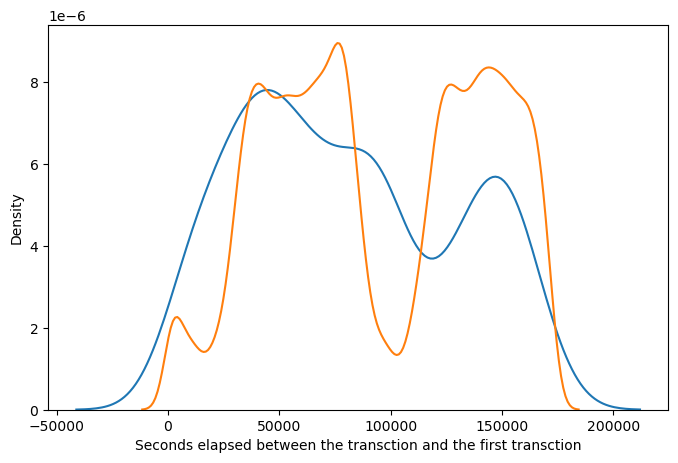

In [19]:
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

Analysis

We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time and there is no correlation between Class and Time. Hence, we can drop the Time column.

In [20]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

### Class corelation with time

In [21]:
amount_corr = df['Class'].corr(df['Amount'], method='pearson')
amount_corr

0.005631753006768527

### Observe the distribution of classes with time

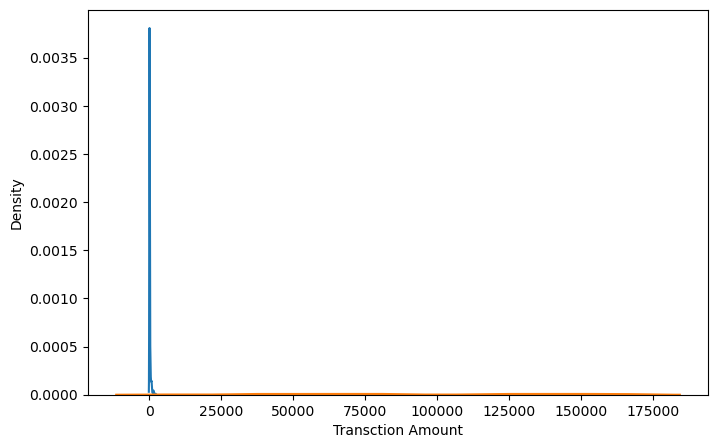

In [22]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

**Analysis**

Even though there is a very low correlation between Class and Amount, this could be affected as the data is very biased. Based on the distribution we could see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.

## Train-Test Split

In [23]:
# Import library
from sklearn.model_selection import train_test_split

In [24]:
# Putting feature variables into X
X = df.drop(['Class'], axis=1)

In [25]:
# Putting target variable to y
y = df['Class']

In [26]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [27]:
from imblearn.over_sampling import RandomOverSampler

In [28]:
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X,y)

In [29]:
y.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [30]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

## Feature Scaling

We need to scale only the Amount column as all other columns are already scaled by the PCA transformation.

In [31]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [32]:
# Instantiate the Scaler
scaler = StandardScaler()

In [33]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [34]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
373474,0.457845,1.373769,-0.488926,2.805351,1.777386,0.100492,1.295016,-0.135857,-1.695822,0.955004,-1.702228,-0.240056,0.456475,0.139567,-1.890974,0.372379,-0.798201,-0.697062,-1.497152,-0.264705,0.105593,0.371014,0.051105,0.401524,-0.724766,-0.202881,0.092124,0.094956,-0.413628
424048,-1.053840,4.362801,-6.023534,5.304534,1.480738,-2.193821,-1.530817,0.626857,-4.037021,-6.285424,3.536145,-7.959628,-1.673429,-12.457999,-0.213885,-1.424131,-3.243686,0.059956,-1.802332,0.531574,0.397954,-0.945402,-0.376138,-0.220480,0.264003,0.048935,0.847220,0.531932,-0.413628
409855,0.196707,1.189757,0.704882,2.891388,0.045555,1.245730,-1.198714,-2.421616,-1.232089,0.324239,-1.273935,-0.868686,-1.181945,1.027584,1.688132,0.256216,0.120608,-0.052346,0.329827,0.646616,-1.328132,0.189311,-0.005524,-0.814708,0.400924,0.286281,0.135215,0.257315,-0.410645
90244,-1.119211,-0.076681,2.532709,0.480750,-0.939219,0.296271,-0.722636,0.130148,1.505440,-0.317114,-1.308296,0.779926,0.492776,-1.501248,-1.381320,-0.859545,0.647092,-0.395979,1.444521,-0.184620,0.016087,0.576419,-0.172156,0.554262,-0.706867,1.076114,-0.329812,0.256419,-0.318103
175414,2.048996,-0.366883,-2.543852,-0.728626,2.387568,3.318339,-0.477944,0.791325,0.403268,0.092813,0.004404,0.390203,-0.212395,0.495747,0.472746,-0.171476,-0.368234,-0.976387,0.022582,-0.153145,-0.292818,-0.835277,0.380947,0.698226,-0.265129,0.219179,-0.052301,-0.066783,-0.406601


Scaling the test and val set

We don't fit scaler on the test set. We only transform the test set.

In [35]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
437378,-8.762083,2.791030,-7.682767,6.991214,-5.230695,-0.357388,-9.685621,1.749335,-4.495679,-7.864506,4.774148,-8.245898,-1.333492,-7.974251,-0.398799,-7.244340,-12.760094,-4.824740,2.836993,-0.460390,-0.090527,0.348590,0.051132,-0.415430,0.219665,0.330020,-0.028252,-0.156270,-0.384103
504222,-6.618211,3.835943,-6.316453,1.844111,-2.476892,-1.886718,-3.817495,0.613470,-1.482121,-4.868747,3.359722,-5.969162,0.051190,-8.724496,0.776391,-3.939384,-7.164430,-2.434672,0.235227,-0.953827,1.636622,0.038727,0.278218,0.786670,0.063895,0.154707,-2.042403,1.405141,-0.186967
4794,-0.851994,0.935553,2.188136,0.709286,0.178930,-0.349335,0.857609,-0.416252,1.066375,-0.474828,0.547066,-1.836009,2.853846,0.766582,-0.797917,-0.839402,0.873381,-0.371732,0.890544,0.270933,-0.411022,-0.404762,-0.096893,0.404476,0.377388,0.344173,-0.000311,-0.125090,-0.293761
388411,-1.410852,2.268271,-2.297554,1.871331,0.248957,-1.208799,-1.358648,1.102916,-1.317364,-4.626919,3.357640,-2.998815,-1.956786,-6.766633,-0.869900,-0.868577,-0.370333,0.419266,-0.894894,0.058063,0.155381,-0.614880,-0.196126,-0.464376,0.118473,-0.484537,0.373596,0.187657,-0.409702
424512,-17.976266,12.864989,-19.575066,11.345120,-13.998646,-0.354900,-23.783470,-4.872353,-8.504285,-16.601197,5.569258,-13.932249,-0.204855,-7.581023,-1.013612,-9.014813,-16.092032,-6.050148,1.661029,2.419921,-4.300432,2.865772,1.489302,0.386039,-0.232392,0.413827,-3.255981,-0.538963,-0.379706


### Checking the Skewness

In [36]:
# Listing the columns
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

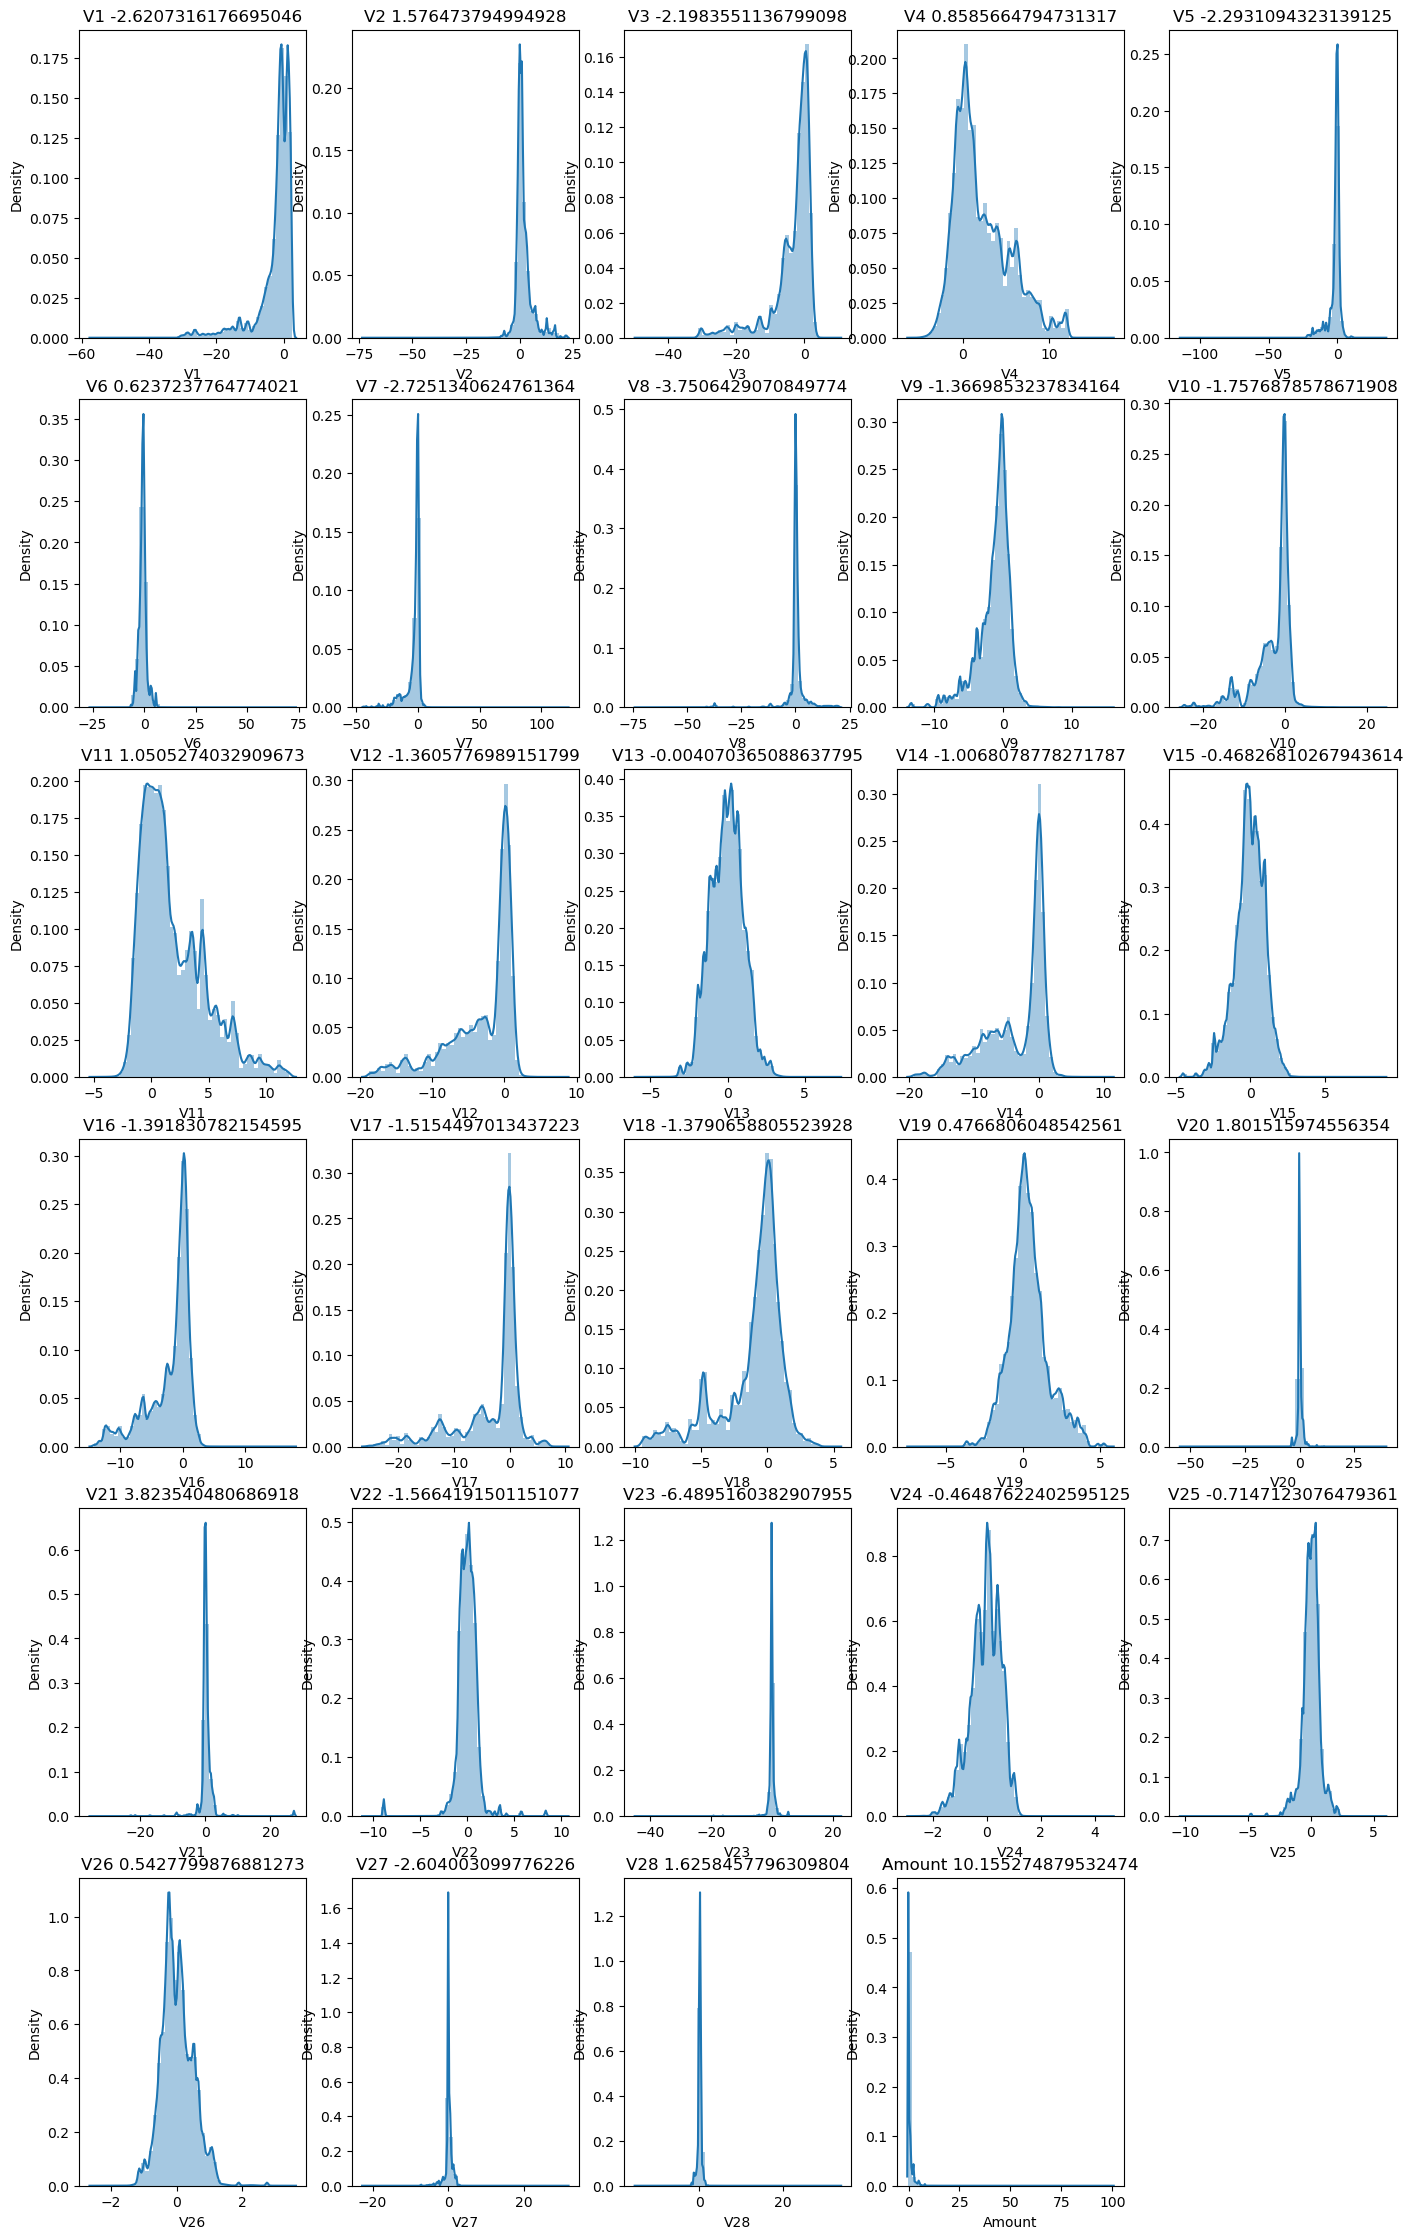

In [37]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

We can see that there is many variables that are skewed. We will mitigate the skewness only for those variables for bringing them into normal distribution.

### Mitigate skweness with PowerTransformer

In [38]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

In [39]:
# Transform the test set
X_test[cols] = pt.transform(X_test)

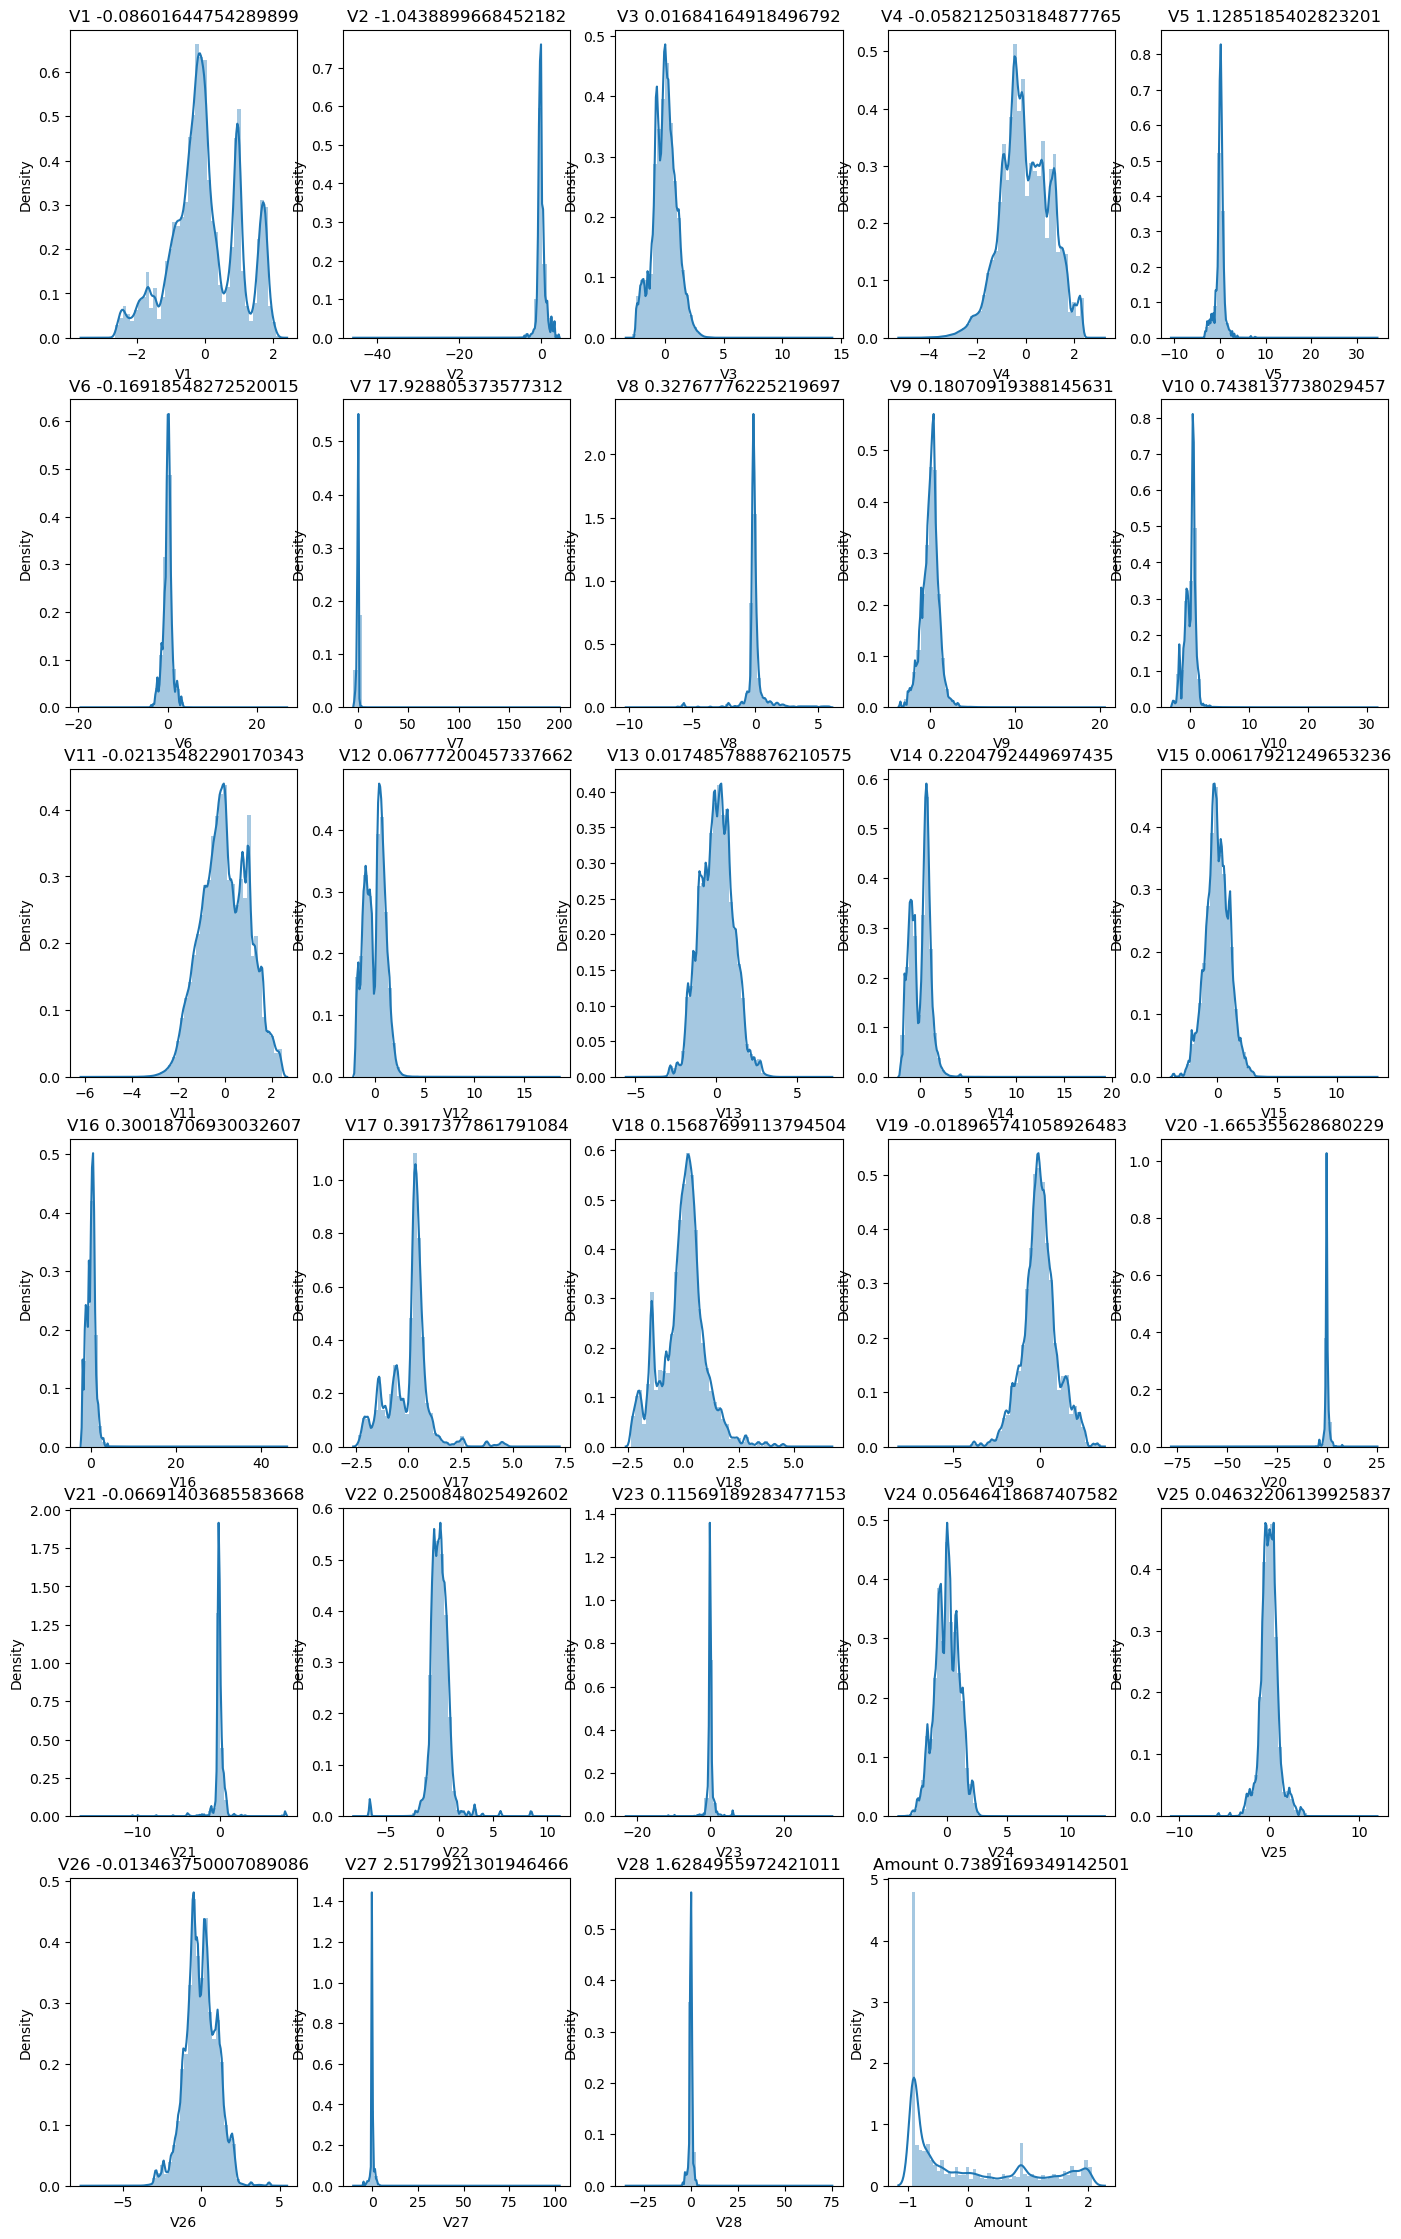

In [40]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

Now we can see that all the variables are normally distributed after the transformation.

# Model

### Logistic Regression

In [41]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [42]:
# Importing metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

### Tuning Hyperparameter C

In [43]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [44]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [45]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.462586,0.015620,0.024834,0.001164,0.01,{'C': 0.01},0.984918,0.985427,0.985484,0.985235,0.985114,0.985236,0.000207,6,0.985332,0.985200,0.985210,0.985248,0.985279,0.985254,0.000048
1,0.502658,0.042261,0.024755,0.004067,0.1,{'C': 0.1},0.984994,0.985503,0.985532,0.985321,0.985200,0.985310,0.000199,5,0.985403,0.985275,0.985288,0.985321,0.985352,0.985328,0.000046
2,0.515656,0.007171,0.026068,0.001634,1,{'C': 1},0.985002,0.985513,0.985539,0.985328,0.985211,0.985319,0.000199,4,0.985409,0.985283,0.985298,0.985328,0.985364,0.985336,0.000046
3,0.517435,0.032479,0.025528,0.003262,10,{'C': 10},0.985001,0.985512,0.985542,0.985328,0.985212,0.985319,0.000200,2,0.985410,0.985283,0.985301,0.985325,0.985365,0.985337,0.000046
4,0.495721,0.020656,0.025614,0.002986,100,{'C': 100},0.985001,0.985513,0.985542,0.985328,0.985212,0.985319,0.000200,1,0.985410,0.985283,0.985300,0.985325,0.985365,0.985337,0.000046
5,0.497906,0.023336,0.023334,0.002453,1000,{'C': 1000},0.985001,0.985513,0.985540,0.985328,0.985212,0.985319,0.000199,3,0.985410,0.985283,0.985300,0.985325,0.985365,0.985337,0.000046


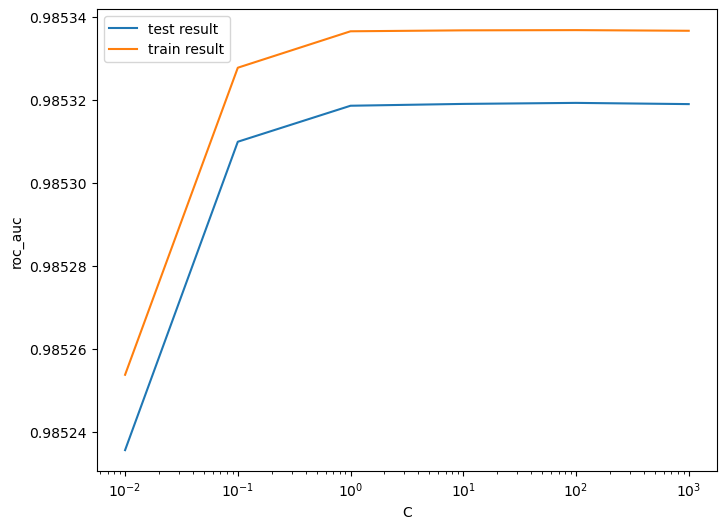

In [46]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [47]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.98531924605477 at C = 100


In [48]:
# Instantiate the model with best C
logistic = LogisticRegression(C=100)

In [49]:
# Fit the model on the train set
logistic_model = logistic.fit(X_train, y_train)

In [50]:
# Prediction on the test set
y_test_pred = logistic_model.predict(X_test)

In [51]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55176  1574]
 [ 4397 52579]]


In [52]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [53]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Percision 
print("Precision:-", TP / float(TP+FP))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9474966146703481
Precision:- 0.9709342049378612
Sensitivity:- 0.9228271552934569
Specificity:- 0.9722643171806168


In [54]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     56750
           1       0.97      0.92      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



Text(0.5, 1.0, 'Confusion Matrix')

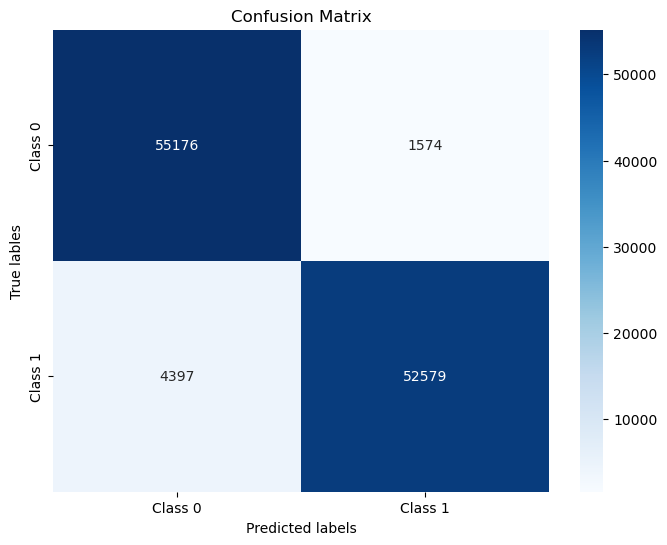

In [55]:
# Plot Confusion Matrix

plt.figure(figsize=(8,6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Class 0', 'Class 1'],
           yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True lables')
plt.title('Confusion Matrix')

In [56]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [57]:
# Predicted probability
y_test_pred_proba = logistic_model.predict_proba(X_test)[:,1]

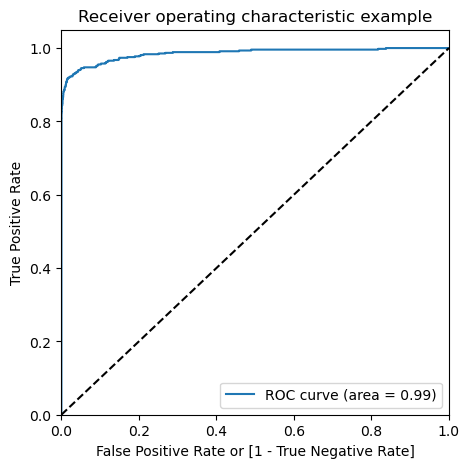

In [58]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### Summary

- Accuracy = 0.94
- Percision = 0.97
- Sensitivity = 0.92
- Specificity = 0.97
- ROC = 0.99

### Decision Tree

In [59]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [60]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(2, 6, 2),
    'min_samples_leaf': range(20, 60, 20),
    'min_samples_split': range(20, 60, 20),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 6, 2),
                         'min_samples_leaf': range(20, 60, 20),
                         'min_samples_split': range(20, 60, 20)},
             scoring='roc_auc', verbose=1)

In [61]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.048723,0.013360,0.024297,0.000425,2,20,20,"{'max_depth': 2, 'min_samples_leaf': 20, 'min_...",0.960186,0.959423,0.959703,0.959771,0.000315,5
1,1.040158,0.006590,0.024954,0.000559,2,20,40,"{'max_depth': 2, 'min_samples_leaf': 20, 'min_...",0.960186,0.959423,0.959703,0.959771,0.000315,5
2,1.045903,0.009162,0.025737,0.000549,2,40,20,"{'max_depth': 2, 'min_samples_leaf': 40, 'min_...",0.960186,0.959423,0.959703,0.959771,0.000315,5
3,1.034243,0.002048,0.022639,0.000124,2,40,40,"{'max_depth': 2, 'min_samples_leaf': 40, 'min_...",0.960186,0.959423,0.959703,0.959771,0.000315,5
4,1.923371,0.004007,0.025892,0.000165,4,20,20,"{'max_depth': 4, 'min_samples_leaf': 20, 'min_...",0.974632,0.973757,0.974376,0.974255,0.000367,3
5,1.927921,0.008395,0.026060,0.000282,4,20,40,"{'max_depth': 4, 'min_samples_leaf': 20, 'min_...",0.974632,0.973757,0.974376,0.974255,0.000367,3
6,1.922889,0.001709,0.026769,0.000114,4,40,20,"{'max_depth': 4, 'min_samples_leaf': 40, 'min_...",0.974687,0.973821,0.974376,0.974295,0.000358,1
7,1.925273,0.003627,0.026767,0.000312,4,40,40,"{'max_depth': 4, 'min_samples_leaf': 40, 'min_...",0.974687,0.973821,0.974376,0.974295,0.000358,1


In [62]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9742948851945189
DecisionTreeClassifier(max_depth=4, min_samples_leaf=40, min_samples_split=20)


In [63]:
# Model with optimal hyperparameters
dt_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=4, 
                                  min_samples_leaf=40,
                                  min_samples_split=20)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=40, min_samples_split=20,
                       random_state=100)

In [64]:
# Predictions on the test set
y_test_pred = dt_model.predict(X_test)

In [65]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[54765  1985]
 [ 3280 53696]]


In [66]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [67]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Percision 
print("Precision:-", TP / float(TP+FP))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9537045178762992
Precision:- 0.9643504965787253
Sensitivity:- 0.942431901151362
Specificity:- 0.9650220264317181


In [68]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     56750
           1       0.96      0.94      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



In [69]:
# Predicted probability
y_test_pred_proba = dt_model.predict_proba(X_test)[:,1]

Text(0.5, 1.0, 'Confusion Matrix')

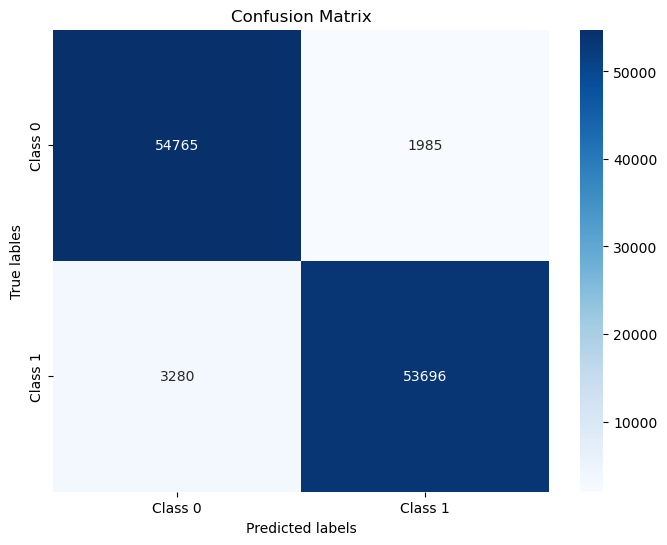

In [70]:
# Plot Confusion Matrix

plt.figure(figsize=(8,6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Class 0', 'Class 1'],
           yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True lables')
plt.title('Confusion Matrix')

In [71]:
# Predicted probability
y_test_pred_proba = dt_model.predict_proba(X_test)[:,1]

In [72]:
# roc_auc
auc1 = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc1

0.9745594357992298

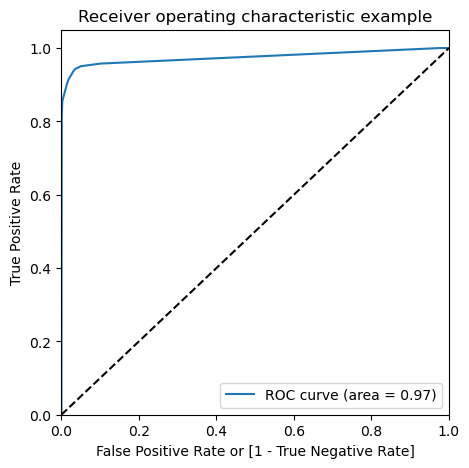

In [73]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### Summary 

- Accuracy = 0.95
- Percision = 0.96
- Sensitivity = 0.94
- Specificity = 0.96
- ROC = 0.97

## Nueral Network

In [74]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

In [75]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [76]:
# Train the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [77]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [78]:
# Train the model
hist = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/20
889/889 [==============================] - 1s 462us/step - loss: 0.1336 - accuracy: 0.9507 - val_loss: 0.0779 - val_accuracy: 0.9709
Epoch 2/20
889/889 [==============================] - 0s 398us/step - loss: 0.0570 - accuracy: 0.9789 - val_loss: 0.0417 - val_accuracy: 0.9887
Epoch 3/20
889/889 [==============================] - 0s 397us/step - loss: 0.0323 - accuracy: 0.9925 - val_loss: 0.0262 - val_accuracy: 0.9957
Epoch 4/20
889/889 [==============================] - 0s 399us/step - loss: 0.0210 - accuracy: 0.9964 - val_loss: 0.0183 - val_accuracy: 0.9972
Epoch 5/20
889/889 [==============================] - 0s 394us/step - loss: 0.0150 - accuracy: 0.9976 - val_loss: 0.0135 - val_accuracy: 0.9975
Epoch 6/20
889/889 [==============================] - 0s 393us/step - loss: 0.0112 - accuracy: 0.9981 - val_loss: 0.0108 - val_accuracy: 0.9977
Epoch 7/20
889/889 [==============================] - 0s 397us/step - loss: 0.0089 - accuracy: 0.9985 - val_loss: 0.0088 - val_accuracy:

In [79]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

3554/3554 [==============================] - 1s 170us/step


In [80]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56696    54]
 [    0 56976]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [81]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Loss', test_loss)
print('Test Accuracy', test_accuracy)

3554/3554 [==============================] - 1s 188us/step - loss: 0.0028 - accuracy: 0.9995
Test Loss 0.002834674436599016
Test Accuracy 0.9995251893997192


In [82]:
# Confusion matrix
confusion = confusion_matrix(y_test,y_pred)

In [83]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [84]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_pred))

# Percision 
print("Precision:-", TP / float(TP+FP))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.999525174542321
Precision:- 0.999053129931615
Sensitivity:- 1.0
Specificity:- 0.9990484581497797


Text(0.5, 1.0, 'Confusion Matrix')

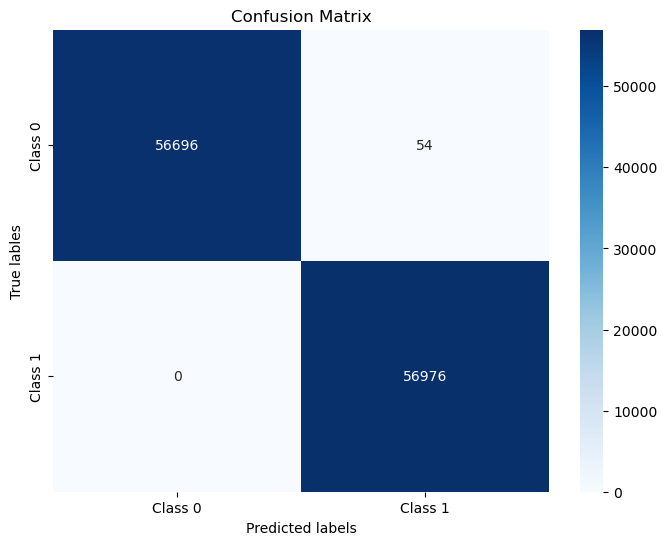

In [85]:
# Plot Confusion Matrix

plt.figure(figsize=(8,6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Class 0', 'Class 1'],
           yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True lables')
plt.title('Confusion Matrix')

## Checking for Overfitting

For Neural Network there is a high chance of overfitting. As such, we need to check for overfitting.

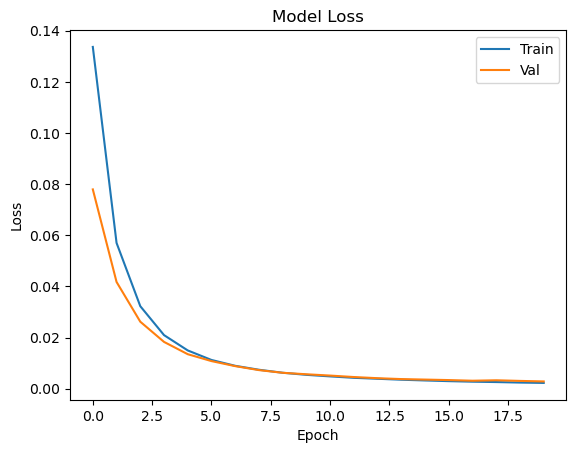

In [86]:
# Plot model loss

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

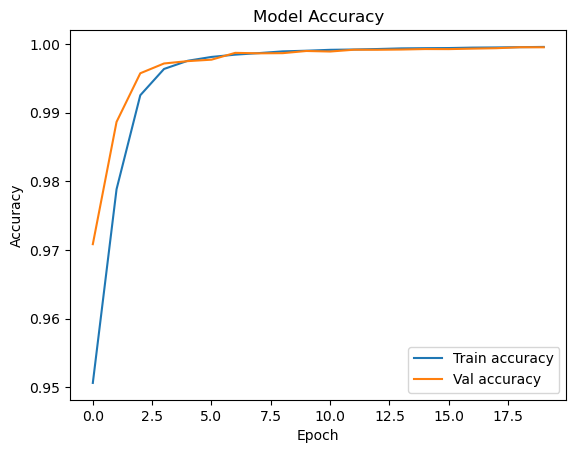

In [87]:
# Plot model accuracy

plt.plot(hist.history['accuracy'], label='Train accuracy')
plt.plot(hist.history['val_accuracy'], label='Val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend();

Based on the Loss and Accuracy Model, we can determine that there is overfitting.

## Handling of Overfitting

In [88]:
from keras import regularizers
from tensorflow.keras.layers import Dropout

In [89]:
# Regularization Method: l2 + dropout

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [90]:
# Compile the model
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [91]:
# Fit model
hist_2 = model_2.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/20
889/889 [==============================] - 1s 593us/step - loss: 0.3155 - accuracy: 0.9307 - val_loss: 0.2053 - val_accuracy: 0.9470
Epoch 2/20
889/889 [==============================] - 0s 500us/step - loss: 0.2148 - accuracy: 0.9434 - val_loss: 0.2028 - val_accuracy: 0.9471
Epoch 3/20
889/889 [==============================] - 0s 478us/step - loss: 0.2131 - accuracy: 0.9429 - val_loss: 0.2029 - val_accuracy: 0.9439
Epoch 4/20
889/889 [==============================] - 0s 481us/step - loss: 0.2125 - accuracy: 0.9426 - val_loss: 0.2029 - val_accuracy: 0.9453
Epoch 5/20
889/889 [==============================] - 0s 481us/step - loss: 0.2124 - accuracy: 0.9429 - val_loss: 0.2025 - val_accuracy: 0.9460
Epoch 6/20
889/889 [==============================] - 0s 478us/step - loss: 0.2120 - accuracy: 0.9427 - val_loss: 0.2025 - val_accuracy: 0.9468
Epoch 7/20
889/889 [==============================] - 0s 477us/step - loss: 0.2118 - accuracy: 0.9425 - val_loss: 0.2024 - val_accuracy:

### Prediction on test set

In [92]:
# Evaluate the model
y_pred_2 = model_2.predict(X_test)
y_pred_2 = (y_pred_2 > 0.5)

3554/3554 [==============================] - 1s 168us/step


In [93]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     56750
           1       0.98      0.90      0.94     56976

    accuracy                           0.94    113726
   macro avg       0.95      0.94      0.94    113726
weighted avg       0.95      0.94      0.94    113726



In [94]:
test_loss_2, test_accuracy_2 = model_2.evaluate(X_test, y_test)
print('Test Loss', test_loss_2)
print('Test Accuracy', test_accuracy_2)

3554/3554 [==============================] - 1s 188us/step - loss: 0.2025 - accuracy: 0.9445
Test Loss 0.20252162218093872
Test Accuracy 0.9445421695709229


In [95]:
# Confusion matrix
confusion = confusion_matrix(y_test,y_pred_2)

In [96]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [97]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_pred_2))

# Precision 
print("Percision:-", TP / float(TP+FP))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9445421451559011
Percision:- 0.9833997977446621
Sensitivity:- 0.9045738556585229
Specificity:- 0.984669603524229


Text(0.5, 1.0, 'Confusion Matrix')

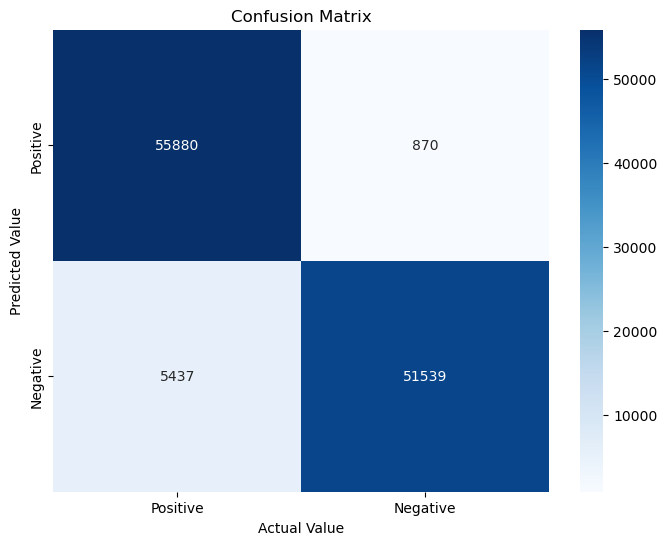

In [98]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Positive', 'Negative'],
           yticklabels=['Positive', 'Negative'])
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Confusion Matrix')

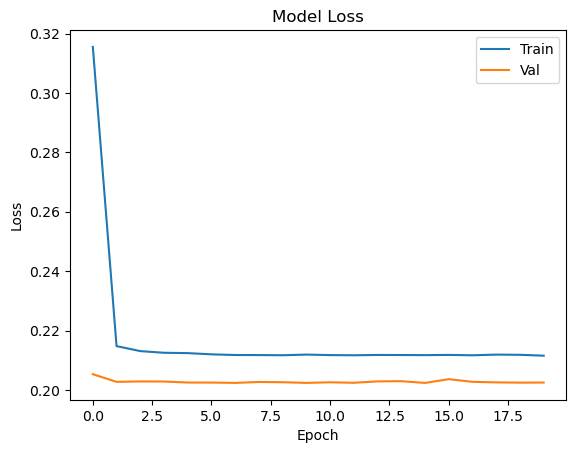

In [99]:
# Plot model loss

plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

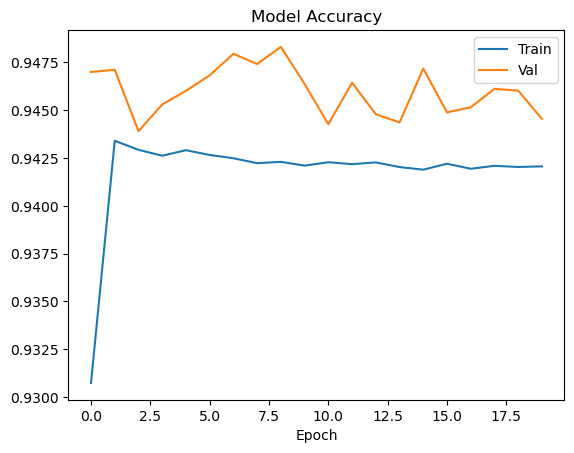

In [100]:
# Plot model accuracy

plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [101]:
# Predicted probability
y_test_pred_proba = model.predict(X_test)

3554/3554 [==============================] - 1s 168us/step


In [102]:
# roc_auc
auc1 = roc_auc_score(y_test, y_test_pred_proba)
auc1

0.9999444551659127

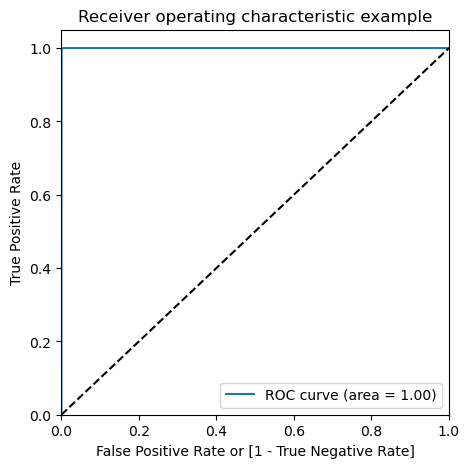

In [103]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### Summary 

- Accuracy = 0.94
- Precision = 0.98
- Sensitivity = 0.91
- Specificity = 0.98
- ROC = 1.00

## Choosing The Best Model

Based on the data we collected, almost all the models performed more or less good. But we should be interested in the best model. To choose the best model, we be looking at Accuracy, Percision and ROC score. Percision is important for banks as a high false positive will impact the reputation of the financial institution.

Among the three models using oversampling to balance the data, we can say that Neural Network is the best model as its percision score is 0.98 and ROC score of 1.00. Even though, Decision Tree have a higher accuracy, the difference is too little to impact the outcome.  


Hence, we can conclude that the Neural Network model is the best model for its percision and ROC.